# Add_feature all
* 추가로 만든(각각 magnitude에서 마이너스한) 변수들 모두 넣어서 진행
* category_features 사용위해 lgb.train사용
* 제출결과 : 34.1706082219(에러수정전)/에러수정후 : 0.3998665405

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import lightgbm as lgb

C:\Users\starl\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# #colab용
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/Dacon/천체관측/')

In [129]:
# path = "/content/drive/My Drive/Colab Notebooks/Dacon/천체관측/data/" #colab
path = "./data/" #local
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

## DATA Setting

In [5]:
column_number = {}
number_columns = {}
for i, column in enumerate(sample_submission_df.columns):
    column_number[column] = i
    number_columns[i] = column
    
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))


In [33]:
train_df.tail(20)

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num,psfMag_u-g,psfMag_u-r,psfMag_u-i,psfMag_u-z,psfMag_g-r,psfMag_g-i,psfMag_g-z,psfMag_r-i,psfMag_r-z,psfMag_i-z,fiberMag_u-g,fiberMag_u-r,fiberMag_u-i,fiberMag_u-z,fiberMag_g-r,fiberMag_g-i,fiberMag_g-z,fiberMag_r-i,fiberMag_r-z,fiberMag_i-z,petroMag_u-g,petroMag_u-r,petroMag_u-i,petroMag_u-z,petroMag_g-r,petroMag_g-i,petroMag_g-z,petroMag_r-i,petroMag_r-z,petroMag_i-z,modelMag_u-g,modelMag_u-r,modelMag_u-i,modelMag_u-z,modelMag_g-r,modelMag_g-i,modelMag_g-z,modelMag_r-i,modelMag_r-z,modelMag_i-z,modelMag_MAX
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
199971,STAR_CARBON,382,22.625700,20.387701,19.180578,18.724365,18.439470,23.244570,20.824554,19.511654,19.013036,18.825047,22.261547,20.501839,19.193129,18.734046,18.630290,22.331502,20.461999,19.156409,18.684223,18.440944,14,2.237999,3.445122,3.901335,4.186230,1.207123,1.663336,1.948231,0.456213,0.741108,0.284895,2.420016,3.732916,4.231535,4.419524,1.312900,1.811519,1.999507,0.498619,0.686608,0.187989,1.759708,3.068418,3.527501,3.631257,1.308710,1.767793,1.871549,0.459083,0.562839,0.103756,1.869504,3.175093,3.647280,3.890558,1.305590,1.777776,2.021054,0.472186,0.715465,0.243279,0
199972,QSO,192,21.648248,20.292540,20.039024,19.988518,19.756245,22.061539,20.600792,20.373516,20.229257,20.010304,21.433811,20.160168,20.032892,19.803047,19.584360,21.810941,20.266387,19.981509,19.888308,19.888474,8,1.355708,1.609224,1.659730,1.892003,0.253516,0.304022,0.536295,0.050506,0.282779,0.232273,1.460747,1.688023,1.832282,2.051235,0.227276,0.371535,0.590488,0.144259,0.363212,0.218953,1.273642,1.400918,1.630764,1.849451,0.127276,0.357121,0.575808,0.229845,0.448532,0.218687,1.544554,1.829433,1.922633,1.922467,0.284879,0.378079,0.377913,0.093200,0.093034,-0.000166,0
199973,GALAXY,492,20.237056,19.309689,19.029259,18.971122,18.679975,20.169905,19.191832,18.845836,18.639477,18.390320,19.588721,18.305483,17.874868,17.635328,17.550942,19.041340,18.119642,17.697008,17.515704,17.304926,6,0.927366,1.207797,1.265933,1.557080,0.280431,0.338567,0.629714,0.058136,0.349283,0.291147,0.978073,1.324068,1.530427,1.779584,0.345995,0.552354,0.801511,0.206359,0.455516,0.249157,1.283238,1.713852,1.953393,2.037779,0.430614,0.670154,0.754540,0.239540,0.323926,0.084386,0.921698,1.344332,1.525636,1.736414,0.422635,0.603939,0.814716,0.181304,0.392082,0.210778,0
199974,SERENDIPITY_BLUE,621,20.616759,20.491745,20.030696,19.870065,19.768550,21.147294,20.847216,20.353162,20.203291,19.837027,20.911236,21.167875,19.736887,19.783960,18.797826,20.789584,20.470793,20.002580,19.877890,19.700079,18,0.125013,0.586062,0.746694,0.848209,0.461049,0.621681,0.723195,0.160632,0.262146,0.101515,0.300078,0.794132,0.944003,1.310267,0.494054,0.643925,1.010189,0.149871,0.516135,0.366264,-0.256639,1.174349,1.127276,2.113410,1.430988,1.383915,2.370049,-0.047073,0.939061,0.986134,0.318791,0.787004,0.911693,1.089505,0.468213,0.592903,0.770714,0.124690,0.302501,0.177811,0
199975,QSO,552,21.639045,20.318907,20.094233,20.000269,20.019506,21.875210,20.673347,20.380178,20.456407,20.330398,21.517888,20.372792,20.056756,20.222786,20.174022,21.591079,20.315934,20.041011,19.992073,19.978690,8,1.320139,1.544812,1.638777,1.619539,0.224674,0.318638,0.299401,0.093964,0.074727,-0.019237,1.201863,1.495032,1.418803,1.544812,0.293169,0.216940,0.342949,-0.076229,0.049780,0.126009,1.145096,1.461132,1.295102,1.343866,0.316036,0.150006,0.198770,-0.166030,-0.117265,0.048764,1.275145,1.550068,1.599006,1.612390,0.274923,0.323861,0.337245,0.048938,0.062321,0.013384,0
199976,SPECTROPHOTO_STD,481,17.902360,16.981784,16.737117,16.646501,16.634837,18.185071,17.301820,17.033316,16.959054,16.952679,17.937603,17.023299,16.754417,16.679179,16.670243,17.890176,16.962337,16.726459,16.636771,16.603564,15,0.920576,1.165243,1.255859,1

In [43]:
def add_minus_feature_all(data,test = False):
    '''
    combination으로 모든 변수들의 조합에 대해서 컬럼생성 
    각 mag에서 가장 높은값의 filter를 받아오는 "~~mag_MAX"생성
    결과 64개로 증가
    '''
    from itertools import combinations
    n = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
        data[mag+"_MAX"] = data[selected].apply(lambda x : str.split(np.argmax(x),'_')[1],axis = 1)
        for combi in list(combinations(selected,2)):
            name_1st = str.split(combi[0],'_')[1]
            name_2nd = str.split(combi[1],'_')[1]
            data[mag+"_"+name_1st+"-"+name_2nd] = data[combi[0]]-data[combi[1]]
        n=count
    return data

In [128]:
def add_minus_feature(data,test = False):
    '''
    근접변수에 대해서만 컬럼생성 ex) 'fiberMag_u-g', 'fiberMag_g-r', 'fiberMag_r-i', 'fiberMag_i-z'
    각 mag에서 가장 높은값의 filter를 받아오는 "~~mag_MAX"생성
    결과 38개로 증가 
    '''
    from itertools import combinations
    n = 0
    m = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
        data[mag+"_MAX"] = data[selected].apply(lambda x : str.split(np.argmax(x),'_')[1],axis = 1)
        for i in range(0,len(selected)):        
            if i>0: 
                name_1st = str.split(m,'_')[1]
                name_2nd = str.split(selected[i],'_')[1]
                data[mag+"_"+name_1st+"-"+name_2nd] = data[m]-data[selected[i]]
            m = selected[i]    
        n=count
    return data

In [130]:
train_df = add_minus_feature(train_df)
test_df = add_minus_feature(test_df,True)

C:\Users\starl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


In [116]:
train_df.type.value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

In [8]:
train_X = train_df.drop(columns=['type', 'type_num'], axis=1)
train_y = train_df['type_num']
test_X = test_df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42,stratify = train_y)

In [10]:
train_ds = lgb.Dataset(X_train, label = y_train, categorical_feature=['fiberID'])
test_ds = lgb.Dataset(X_test, label = y_test, categorical_feature=['fiberID']) 

In [11]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': train_y.nunique(),
    'metric': {'multi_logloss','multi_logloss'},
    'num_leaves': 25,
    'learning_rate': 0.005,
    'max_depth' : 12,
    'random_state' : 42
}

## Modeling

In [12]:
evaluation_results = {}
lgmb_model = lgb.train(params, train_ds,num_boost_round= 20000, 
                       valid_sets = [train_ds,test_ds], valid_names=['Train', 'Test'],
                       evals_result=evaluation_results,
                       verbose_eval=100, early_stopping_rounds=100)

C:\Users\starl\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 100 rounds
[100]	Train's multi_logloss: 1.2872	Test's multi_logloss: 1.30877
[200]	Train's multi_logloss: 0.902364	Test's multi_logloss: 0.936763
[300]	Train's multi_logloss: 0.686358	Test's multi_logloss: 0.733247
[400]	Train's multi_logloss: 0.553236	Test's multi_logloss: 0.611216
[500]	Train's multi_logloss: 0.466339	Test's multi_logloss: 0.535589
[600]	Train's multi_logloss: 0.408258	Test's multi_logloss: 0.488171
[700]	Train's multi_logloss: 0.367349	Test's multi_logloss: 0.457182
[800]	Train's multi_logloss: 0.336663	Test's multi_logloss: 0.436689
[900]	Train's multi_logloss: 0.313128	Test's multi_logloss: 0.423667
[1000]	Train's multi_logloss: 0.293778	Test's multi_logloss: 0.414803
[1100]	Train's multi_logloss: 0.277765	Test's multi_logloss: 0.408891
[1200]	Train's multi_logloss: 0.264403	Test's multi_logloss: 0.404987
[1300]	Train's multi_logloss: 0.252648	Test's multi_logloss: 0.402499
[1400]	Train's multi_logloss: 0.242076	T

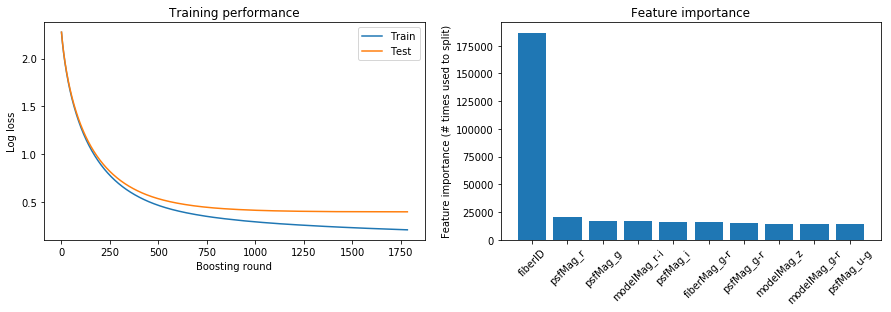

In [20]:
fig, axs = plt.subplots(1, 2, figsize=[15, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['multi_logloss'], label='Train')
axs[0].plot(evaluation_results['Test']['multi_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': lgmb_model.feature_name(), 
                            'importance': lgmb_model.feature_importance()}).sort_values('importance', ascending=False).head(10)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')
plt.xticks(rotation=45)

plt.show()

In [21]:
train_y_pred = lgmb_model.predict(X_test)
real_y_pred = lgmb_model.predict(test_X)

In [22]:
train_y_pred.shape

(59998, 19)

In [23]:
#log_loss
log_loss(y_test,train_y_pred,labels= list(set(y_test)))

0.39861183678248857

In [24]:
lgmb_model.feature_importance()

array([186778,   8697,  16770,  20425,  15993,  12211,   8608,  10731,
        13227,  12700,   7681,   8745,   8087,   9445,   9852,   9080,
         9207,  10427,   8986,   9159,  14486,  14175,   8607,   5429,
         4333,  14790,   8312,   5035,  11608,   6832,  11059,  12007,
         7387,   4663,   5461,  15845,   8575,   5776,  11372,  10746,
        12767,  13175,   6717,   5185,   4069,  11328,   5556,   4893,
        10176,   5899,   8195,  14014,   8022,   5185,   4168,  14333,
         8436,   4911,  16593,   8863,  12108])

### feature_importance

In [25]:
pi_df = pd.DataFrame(lgmb_model.feature_importance(), index= train_X.columns,columns= ['importance']).sort_values('importance',ascending = False)
pi_df.head(10)

,importance
fiberID,186778
psfMag_r,20425
psfMag_g,16770
modelMag_r-i,16593
psfMag_i,15993
fiberMag_g-r,15845
psfMag_g-r,14790
modelMag_z,14486
modelMag_g-r,14333
psfMag_u-g,14175


### 예측결과에 대해
* 12번이 모두 6번으로 몰림
중간예측 : 0,2,7,11
망한예측 : 12,17

In [26]:
cm_result = pd.DataFrame(confusion_matrix(y_test,np.argmax(train_y_pred,axis = 1)))

In [27]:
cm_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,233,0,0,0,17,57,5,171,58,0,0,18,0,1,17,10,0,0,61
1,1,1880,0,0,0,0,1,3,13,0,3,4,0,0,0,0,6,0,41
2,0,0,68,73,0,0,0,0,0,1,8,0,0,0,0,0,0,0,0
3,0,0,32,650,0,0,1,0,0,1,85,0,0,0,0,0,0,0,0
4,1,0,0,0,4251,25,1,0,9,0,0,11,0,0,0,88,0,0,0
5,27,0,1,0,150,3632,2,71,62,0,0,3,0,0,0,86,0,0,16
6,3,23,0,0,12,1,10903,5,88,1,0,53,0,81,20,14,0,0,0
7,146,0,0,0,0,195,1,683,21,0,0,3,0,0,0,1,0,0,346
8,8,10,0,8,34,236,126,36,13080,0,12,249,0,72,75,9,15,0,934
9,0,0,0,0,0,0,0,0,8,30,0,0,0,0,0,0,0,0,0


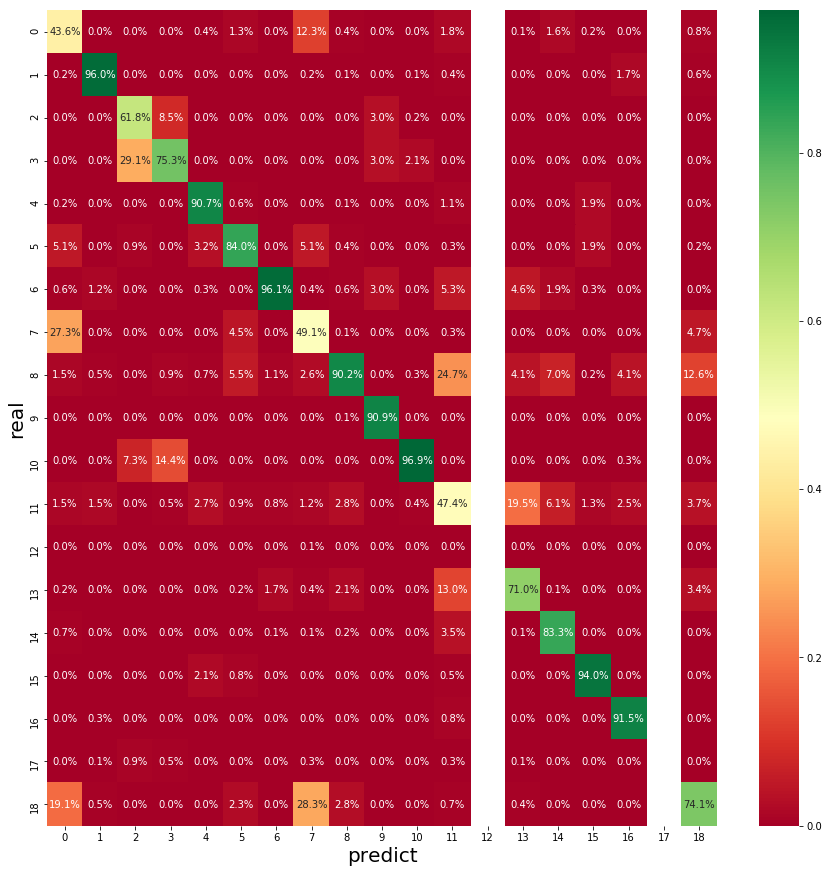

In [28]:
plt.figure(figsize =(15,15))
sns.heatmap(cm_result/np.sum(cm_result),annot = True, cmap ='RdYlGn',fmt='.1%')
plt.ylabel("real",fontsize=20)
plt.xlabel("predict",fontsize=20)
plt.show()

# REAL

In [29]:
train_ds = lgb.Dataset(train_X, label = train_y, categorical_feature=['fiberID'])

In [30]:
lgmb_model = lgb.train(params, train_ds,num_boost_round= 2000, verbose_eval=100)

C:\Users\starl\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [31]:
y_pred = lgmb_model.predict(test_X)

In [32]:
y_pred

array([[3.28063156e-05, 8.35008722e-05, 5.94463590e-05, ...,
        2.87269450e-05, 6.54995818e-06, 2.70487475e-04],
       [2.00635102e-04, 3.96448496e-04, 2.79048360e-05, ...,
        6.20603394e-05, 5.82925295e-06, 1.39628659e-03],
       [8.38614033e-05, 3.31639351e-05, 1.87845398e-06, ...,
        4.16007667e-06, 3.92813637e-07, 9.39930305e-05],
       ...,
       [2.02831320e-04, 4.07818989e-04, 2.04074743e-05, ...,
        4.51949628e-05, 4.26767467e-06, 7.99281875e-02],
       [4.57876031e-06, 8.50060006e-06, 5.59158285e-07, ...,
        1.23832756e-06, 1.16922842e-07, 2.85951657e-04],
       [4.71020679e-04, 7.71596912e-06, 5.27732530e-07, ...,
        1.16873121e-06, 1.10343543e-07, 7.14463332e-05]])

In [33]:
real_y_pred

array([[4.75327456e-05, 1.33148051e-04, 8.23810107e-05, ...,
        2.15369185e-05, 2.39626013e-06, 4.53485907e-04],
       [3.30795991e-04, 7.44575083e-04, 5.22072366e-05, ...,
        1.19600211e-04, 7.87485208e-06, 2.48050541e-03],
       [1.32824348e-04, 4.89583031e-05, 3.25847243e-06, ...,
        7.44564653e-06, 4.93409353e-07, 1.54940307e-04],
       ...,
       [3.26876354e-04, 6.18658692e-04, 4.16342394e-05, ...,
        9.50600661e-05, 6.29857296e-06, 9.52795469e-02],
       [1.11577777e-05, 2.71457546e-05, 1.77770870e-06, ...,
        4.05889741e-06, 2.68937973e-07, 5.56443066e-04],
       [4.96349413e-04, 2.32149873e-05, 1.63934661e-06, ...,
        3.74298652e-06, 2.48045422e-07, 1.15247077e-04]])

In [34]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission_df.columns, index=sample_submission_df.index)
submission.to_csv('./submisson/submission.csv', index=True)

In [35]:
#제출변경
submission = pd.DataFrame(data=real_y_pred, columns=sample_submission_df.columns, index=sample_submission_df.index)
submission.to_csv('submission.csv', index=True)